## Самостоятельная работа 3. Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
pd.__version__

'2.1.1'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [3]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values='?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [4]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [5]:
df.shape
# Ответ: 32561 строка, 15 столбцов

(32561, 15)

3) Какие типы данных у элементов этого датасета?

In [6]:
df.dtypes
# Ответ: int64, object

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

4) Какие признаки имеют пропуски?

In [7]:
df.isnull().sum(axis = 0)
# NaN значений нет, возможно стоит поискать по-другому

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [8]:
# функция, которая возвращает словарь с пропущенными значениями: 
# ключ - столбец, значение - количество пропусков 
def count_value(df, value):
    result = {}
    for column in df.columns:
        count = df[column].value_counts().get(value, 0)
        result[column] = count    
    return result

count_value(df, ' ?')
# Ответ: workclass, occupation, native.country

{'age': 0,
 'workclass': 1836,
 'fnlwgt': 0,
 'education': 0,
 'education.num': 0,
 'marital.status': 0,
 'occupation': 1843,
 'relationship': 0,
 'race': 0,
 'sex': 0,
 'capital.gain': 0,
 'capital.loss': 0,
 'hours.per.week': 0,
 'native.country': 583,
 'income': 0}

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ: мы видим, что большая часть пропусков связана с текущим местом работы, возможно это связано с тем, что компании, в которых работают данные люди имеют некоторый уровень секретности и конфиденциальности. 
Также, часть пропущенных значений связаны с признаком "native.country" - страной рождения анкетируемого человека. Возможно, часть людей не хотят делиться этой информацией из-за проблем с визой. 

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [9]:
df.workclass.value_counts()
# Ответ указан ниже

workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

7) Какой средний возраст женщин и мужчин?

In [10]:
df.groupby(by = 'sex', as_index = False).agg({'age':'mean'})
# Ответ: средний возраст женщин 36.86 лет, мужчин - 39.43 лет

,sex,age
0,Female,36.858230
1,Male,39.433547


8) Постройте гистограмму(bar) распределения образования людей (education)

<Axes: >

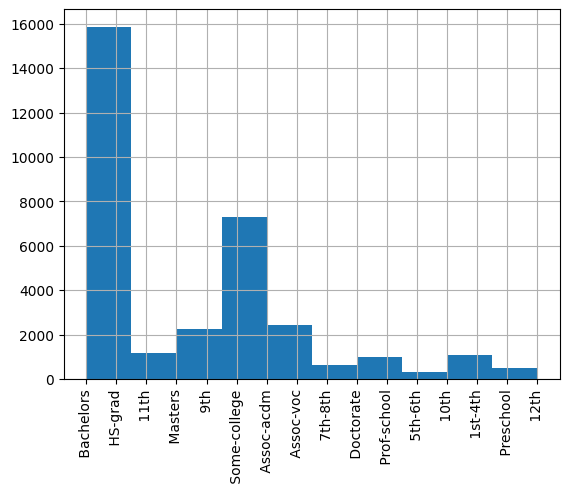

In [11]:
df.education.hist(xrot = 90)

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год?

In [12]:
df.groupby(by = 'income', as_index = False).agg({'age' : ['mean', 'std']})
# Ответ представлен ниже (mean - средние значения, std - среднеквадратичные отклонения)

income        age           
                mean        std
0   <=50K  36.783738  14.020088
1    >50K  44.249841  10.519028

10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [13]:
df.query("income == ' >50K'").education.value_counts()
# Ответ: не все люди, которые получают более 50К имеют высшее образование. 
# Люди с образование HS-grad, Some-college получают более 50К и их количество сравнимо с количеством людей с высшим образованием.  

education
 Bachelors       2221
 HS-grad         1675
 Some-college    1387
 Masters          959
 Prof-school      423
 Assoc-voc        361
 Doctorate        306
 Assoc-acdm       265
 10th              62
 11th              60
 7th-8th           40
 12th              33
 9th               27
 5th-6th           16
 1st-4th            6
Name: count, dtype: int64

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [14]:
import re 
married_lst = [status for status in df['marital.status'].unique() if re.match(r' Married\w*', status)]
df['married'] = df['marital.status'].isin(married_lst)
df.query("sex == ' Male'").groupby(by = 'married')['income'].value_counts(normalize = True)
# Ответ: доля зарабытывающих более 50К больше среди женатых мужчин (44.05% против 8.45%) 

married  income
False     <=50K    0.915505
          >50K     0.084495
True      <=50K    0.559486
          >50K     0.440514
Name: proportion, dtype: float64

12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country).

In [15]:
df.groupby(by = ['native.country', 'income']).agg({'hours.per.week' : 'mean'})
# Ответ представлен ниже

hours.per.week
native.country income                
 ?              <=50K       40.164760
                >50K        45.547945
 Cambodia       <=50K       41.416667
                >50K        40.000000
 Canada         <=50K       37.914634
...                               ...
 United-States  >50K        45.505369
 Vietnam        <=50K       37.193548
                >50K        39.200000
 Yugoslavia     <=50K       41.600000
                >50K        49.500000

[82 rows x 1 columns]

13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам.

In [23]:
df['capital_diff_log'] = np.log(np.abs(df['capital.gain'] - df['capital.loss']))
df['capital_diff_log_round'] = np.round(df['capital_diff_log'], decimals = 0)

pd.pivot_table(df, index = 'education', columns = 'capital_diff_log_round', aggfunc = len, fill_value = 0)

C:\Users\iegor\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


age                                                  \
capital_diff_log_round -inf   5.0   6.0   7.0   8.0   9.0   10.0  11.0  12.0   
education                                                                      
 10th                    865     2     1    17    38     5     3     0     2   
 11th                   1089     0     6    24    35    17     4     0     0   
 12th                    403     0     3     9    10     5     3     0     0   
 1st-4th                 159     0     0     2     6     1     0     0     0   
 5th-6th                 308     0     0     4    16     5     0     0     0   
 7th-8th                 582     0     0    17    39     8     0     0     0   
 9th                     474     2     2    13    20     2     0     0     1   
 Assoc-acdm              930     0     0    25    63    33    15     0     1   
 Assoc-voc              1194     0     3    19    94    52    19     0     1   
 Bachelors              4384     2     4   101   376   274   173     0    41   
 Doctorate               284     0     1     4    59    20    33     0    12   
 HS-grad                9415     2    20   186   570   217    68     0    23   
 Masters                1300     1     2    25   170   112    94     1    18   
 Preschool                47     0     0     2     1     0     0     1     0   
 Prof-school             363     0     0    10    66    19    72     0    46   
 Some-college           6533     2    15   137   349   179    62     0    14   

                       capital.gain  ...   sex workclass                    \
capital_diff_log_round        -inf   ...  12.0     -inf   5.0   6.0   7.0    
education                            ...                                     
 10th                           865  ...     2       865     2     1    17   
 11th                          1089  ...     0      1089     0     6    24   
 12th                           403  ...     0       403     0     3     9   
 1st-4th                        159  ...     0       159     0     0     2   
 5th-6th                        308  ...     0       308     0     0     4   
 7th-8th                        582  ...     0       582     0     0    17   
 9th                            474  ...     1       474     2     2    13   
 Assoc-acdm                     930  ...     1       930     0     0    25   
 Assoc-voc                     1194  ...     1      1194     0     3    19   
 Bachelors                     4384  ...    41      4384     2     4   101   
 Doctorate                      284  ...    12       284     0     1     4   
 HS-grad                       9415  ...    23      9415     2    20   186   
 Masters                       1300  ...    18      1300     1     2    25   
 Preschool                       47  ...     0        47     0     0     2   
 Prof-school                    363  ...    46       363     0     0    10   
 Some-college                  6533  ...    14      6533     2    15   137   

                                                      
capital_diff_log_round  8.0   9.0   10.0  11.0  12.0  
education                                             
 10th                     38     5     3     0     2  
 11th                     35    17     4     0     0  
 12th                     10     5     3     0     0  
 1st-4th                   6     1     0     0     0  
 5th-6th                  16     5     0     0     0  
 7th-8th                  39     8     0     0     0  
 9th                      20     2     0     0     1  
 Assoc-acdm               63    33    15     0     1  
 Assoc-voc                94    52    19     0     1  
 Bachelors               376   274   173     0    41  
 Doctorate                59    20    33     0    12  
 HS-grad                 570   217    68     0    23  
 Masters                 170   112    94     1    18  
 Preschool                 1     0     0     1     0  
 Prof-school              66    19    72     0    46  
 Some-college            349   

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [43]:
salary_df = df.query("sex == ' Female'").groupby(by = 'native.country', as_index = False)['income'] \
    .value_counts(normalize = True, ascending = True)
salary_df.query("income == ' >50K' ").sort_values(by = 'proportion', ascending = False)
# Ответ: в относительном выражении чаще всего женщины из Югославии, Тайвани и Франции получают большую зарплату.

,native.country,income,proportion
74,Yugoslavia,>50K,0.333333
65,Taiwan,>50K,0.266667
17,France,>50K,0.250000
43,Japan,>50K,0.250000
35,Iran,>50K,0.250000
39,Italy,>50K,0.238095
5,China,>50K,0.238095
3,Canada,>50K,0.230769
21,Greece,>50K,0.200000
61,Scotland,>50K,0.200000


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [130]:
import random as r
def add_magic(income):
    if income == ' <=50K':
        return r.randint(0, 50)
    return r.randint(51, 200)

df['magic_salary'] = df['income'].apply(add_magic)

# Если сделать допущения, что каждый человек работает в неделю ровно столько часов, сколько он указал
# и в месяце обычно 4 недели, то получим:

df['m_magic_salary'] = df['magic_salary'] / (df['hours.per.week'] * 4)
df.groupby(by = 'education', as_index = False).agg({'m_magic_salary' : 'mean'})
# Ответ представлен ниже

,education,m_magic_salary
0,10th,0.280024
1,11th,0.280480
2,12th,0.263795
3,1st-4th,0.221193
4,5th-6th,0.216871
5,7th-8th,0.242086
6,9th,0.244488
7,Assoc-acdm,0.369909
8,Assoc-voc,0.339066
9,Bachelors,0.415869
